In [1]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import numpy as np

In [2]:
# carregando os dados na variável df
df = pd.read_csv('titanic.csv')

In [3]:
# visualizando as 5 primeiras unidades amostrais
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# funcões para fazer tabelas
def get_freq_table(df, column):
    counts = df[column].value_counts()
    total = counts.sum()
    freq = pd.DataFrame({
        column: counts.index,
        'Frequência Absoluta': counts.values,
        'Frequência Relativa': ["{:.2f}".format(100*v) for v in counts.values/counts.sum()]
    })
    freq = freq.set_index(freq[column])
    freq.drop(column,1,inplace=True)
    return freq

In [5]:
freq_sex = get_freq_table(df, 'Survived')
freq_sex

,Frequência Absoluta,Frequência Relativa
Survived,,
0,549,61.62
1,342,38.38


In [6]:
freq_survived = get_freq_table(df, 'Sex')
freq_survived

,Frequência Absoluta,Frequência Relativa
Sex,,
male,577,64.76
female,314,35.24


In [7]:
pd.crosstab(df['Survived'], df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [8]:
pd.crosstab(df['Survived'],df['Sex']).apply(lambda r: round(100*r/r.sum(),2), axis=1)

Sex,female,male
Survived,,
0,14.75,85.25
1,68.13,31.87


In [9]:
# restringindo a passageiros que pagaram mais de 100 dolares
df_fare_leq_100 = df[df['Fare']>=100]
pd.crosstab(df_fare_leq_100['Survived'],df_fare_leq_100['Sex']).apply(lambda r: round(100*r/r.sum(),2), axis=1)

Sex,female,male
Survived,,
0,14.29,85.71
1,82.05,17.95


In [10]:
freq_sex = get_freq_table(df_fare_leq_100, 'Survived')
freq_sex

,Frequência Absoluta,Frequência Relativa
Survived,,
1,39,73.58
0,14,26.42


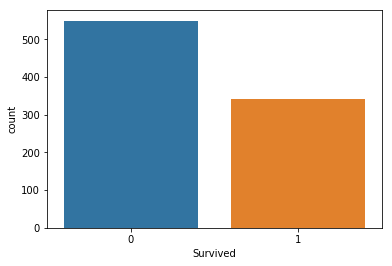

In [11]:
sns.countplot(x='Survived',data=df)
plt.show()

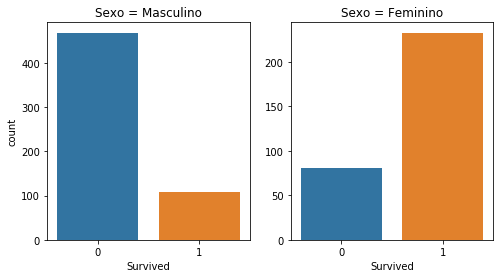

In [12]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='Survived', data=df[df['Sex']=='male'][['Survived']],order = df['Survived'].value_counts().index)
ax1.set_title("Sexo = Masculino")
plt.subplot(1,2,2)
ax2 = sns.countplot(x="Survived", data=df[df['Sex']=='female'][['Survived']],order = df['Survived'].value_counts().index)
ax2.set_title("Sexo = Feminino")
ax2.set_ylabel("")
plt.show()

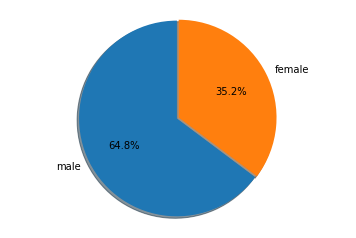

In [13]:
labels = ('male', 'female')
sizes = [577,314]
explode = (0.01, 0.01)  # only "explode" the 1nd slice (i.e. 'S')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

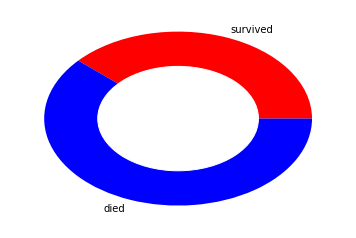

In [14]:
# library
import matplotlib.pyplot as plt
 
# create data
names='groupA', 'groupB'
size=[342,549]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.6, color='white')

# Give color names
plt.pie(size, labels=['survived','died'], colors=['red','blue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

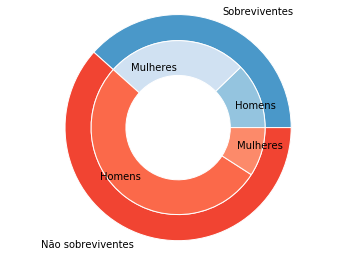

In [15]:
# Make data: I have 3 groups and 7 subgroups
group_names=['Sobreviventes', 'Não sobreviventes']
group_size=[342,549]
subgroup_names=['Homens', 'Mulheres', 'Homens', 'Mulheres']
subgroup_size=[109,233,468,81]
 
# Create colors
a, b=[plt.cm.Blues, plt.cm.Reds]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.4), a(0.2), b(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

In [16]:
df[['Fare','Age']].describe()

,Fare,Age
count,891.000000,714.000000
mean,32.204208,29.699118
std,49.693429,14.526497
min,0.000000,0.420000
25%,7.910400,20.125000
50%,14.454200,28.000000
75%,31.000000,38.000000
max,512.329200,80.000000


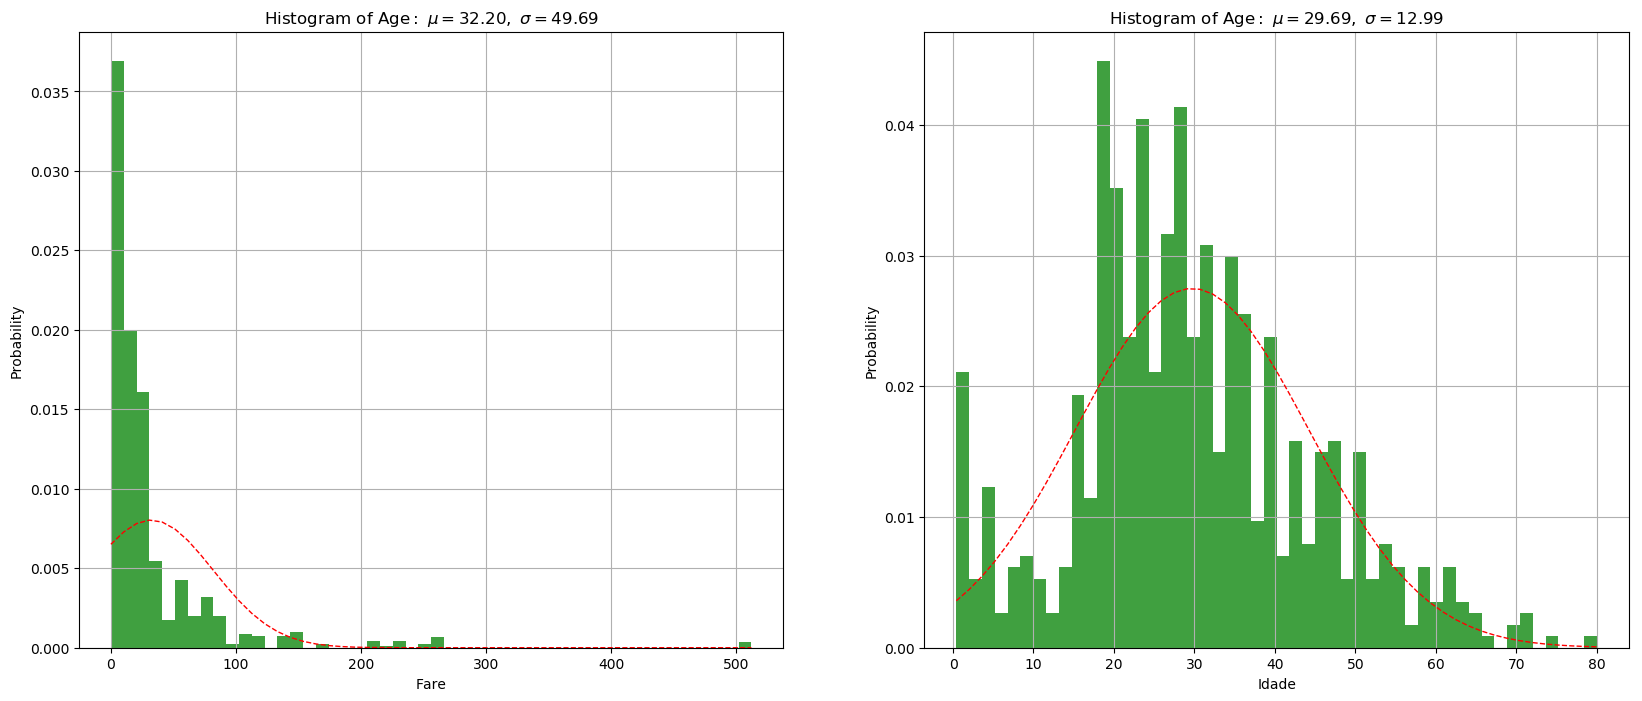

In [17]:
plt.rcdefaults()
plt.figure(figsize=(20,8))
plt.subplot(121)
mu, sigma = np.mean(df['Fare']), np.std(df['Fare'])

x = df['Fare'].dropna()
# the histogram of the data
n, bins, patches = plt.hist(x, bins=50, normed=1, facecolor='green', alpha=0.75)
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Fare')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Age:}\ \mu=32.20,\ \sigma=49.69$')
plt.grid(True)

plt.subplot(122)
mu, sigma = np.mean(df['Age']), np.std(df['Age'])
x = df['Age'].dropna()
# the histogram of the data
n, bins, patches = plt.hist(x, bins=50, normed=1, facecolor='green', alpha=0.75)
# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Idade')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Age:}\ \mu=29.69,\ \sigma=12.99$')
plt.grid(True)

plt.show()

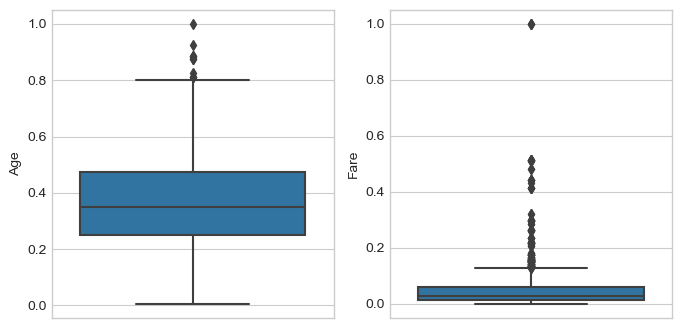

In [18]:
plt.rcdefaults()
sns.set_style("whitegrid")

plt.figure(figsize=(8,4))
plt.subplot(121)
ax = sns.boxplot(y=df["Age"]/df['Age'].max())

plt.subplot(122)
ax = sns.boxplot(y=df["Fare"]/df["Fare"].max())
plt.show()

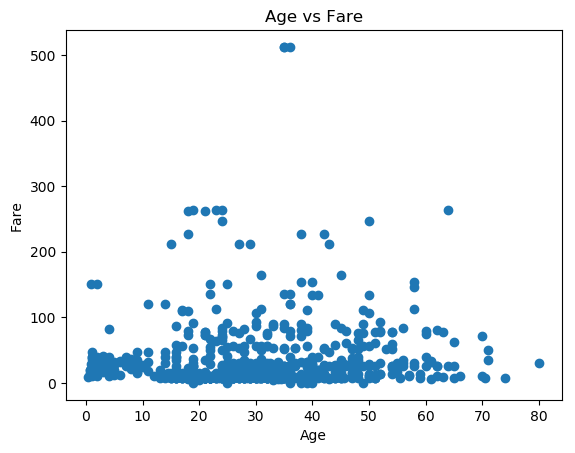

In [19]:
plt.rcdefaults()

xdata = df['Age']
ydata = df['Fare']

plt.scatter(x=xdata, y=ydata)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

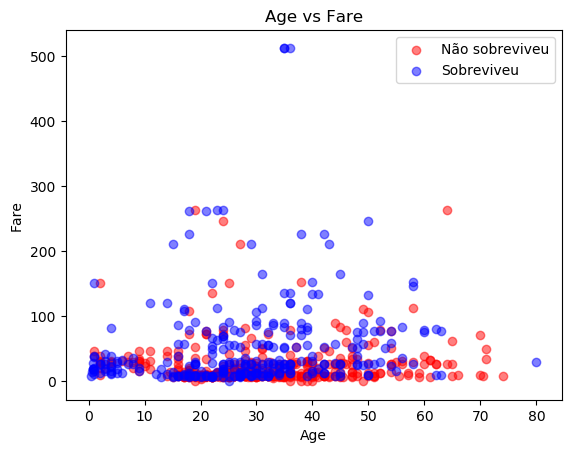

In [20]:
df = df[['Age','Fare','Survived','Sex']].dropna()
plt.rcdefaults()

dead_age = df[df['Survived']==0]['Age']
live_age = df[df['Survived']==1]['Age']
dead_fare = df[df['Survived']==0]['Fare']
live_fare = df[df['Survived']==1]['Fare']

colors = len(dead_age)*['red'] + len(live_age)*['blue']

xdata = list(dead_age)+list(live_age)
ydata = list(dead_fare)+list(live_fare)

plt.scatter(x=dead_age, y=dead_fare, c='red', label='Não sobreviveu', alpha=0.5)
plt.scatter(x=live_age, y=live_fare, c='blue', label='Sobreviveu', alpha=0.5)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

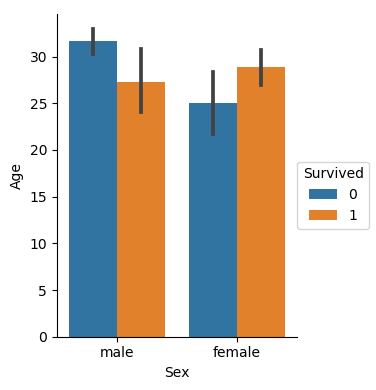

In [21]:
plt.figure(figsize=(16,12))
sns.factorplot(
    x="Sex", 
    y="Age", 
    hue="Survived", 
    data=df, 
    kind="bar", 
    size=4, 
    aspect=.8)
plt.show()

In [22]:
df[(df['Survived']==0)&(df['Sex']=='male')]['Age'].mean()

31.618055555555557